#### Mini-Project 2

In [1]:
import requests as re
import os
import pandas as pd
import numpy as np

from pandas.io.json import json_normalize
import json

In [2]:
#set the keys
foursquare_id = os.environ["FOURSQUARE_ID"]
foursquare_secret = os.environ["FOURSQUARE_KEY"]

In [4]:
fs_url = "https://api.foursquare.com/v3/places/search"
fs_url_test = "https://api.foursquare.com/v3/places/search?query=coffee&ll=45.5045%2C-73.5573&radius=3000"
fs_url_test2 = "https://api.foursquare.com/v3/places/5a187743ccad6b307315e6fe"

In [5]:
fs_headers = {
    "Accept": "application/json",
    "Authorization": foursquare_secret
}

In [7]:
fs_response = re.get(fs_url_test, headers=fs_headers)

In [8]:
print(fs_response.status_code)

200


In [9]:
fs_json = fs_response.json()

In [10]:
df_fs = pd.json_normalize(fs_json, record_path=['results'])

In [11]:
df_fs.head(10)

,fsq_id,categories,chains,distance,link,name,timezone,geocodes.main.latitude,geocodes.main.longitude,geocodes.roof.latitude,...,location.country,location.cross_street,location.formatted_address,location.locality,location.neighborhood,location.postcode,location.region,location.address_extended,related_places.parent.fsq_id,related_places.parent.name
0,4aedfa55f964a520d5d021e3,"[{'id': 13036, 'name': 'Tea Room', 'icon': {'p...",[],119,/v3/places/4aedfa55f964a520d5d021e3,Ming Tao Xuan,America/Toronto,45.504824,-73.555810,45.504824,...,CA,,"451 Saint-Sulpice Rue, Montréal QC H2Y 2V8",Montreal,[Old Montreal],H2Y 2V8,QC,NaN,NaN,NaN
1,556467ea498e21a8004aabc5,"[{'id': 13016, 'name': 'Lounge', 'icon': {'pre...",[],81,/v3/places/556467ea498e21a8004aabc5,Tommy,America/Toronto,45.503713,-73.557373,45.503713,...,CA,coin Saint-François Xavier,200 Notre-Dame Rue O (coin Saint-François Xavi...,Montreal,[Old Montreal],H2Y 1T3,QC,Bldg,NaN,NaN
2,4ba79a3ef964a5205aa139e3,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],98,/v3/places/4ba79a3ef964a5205aa139e3,Café Luna d'Oro Inc,America/Toronto,45.503725,-73.556792,45.503725,...,CA,NaN,"469 Saint-Francois-Xavier Rue, Montréal QC H2Y...",Montreal,[Old Montreal],H2Y 2T1,QC,NaN,NaN,NaN
3,5ac933656f706a2643523471,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],214,/v3/places/5ac933656f706a2643523471,Tommy Café - Rue St-Paul Ouest,America/Toronto,45.503417,-73.555136,45.503417,...,CA,,"151 Saint-Paul Rue O, Montréal QC H2Y 1Z5",Montreal,NaN,H2Y 1Z5,QC,NaN,NaN,NaN
4,5aee235b947c05002ca7bd54,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],213,/v3/places/5aee235b947c05002ca7bd54,Paquebot,America/Toronto,45.506234,-73.556290,45.506234,...,CA,Saint-Jacques,"520 Saint-Laurent Blvd (Saint-Jacques), Montré...",Montreal,[Old Montreal],H2Y 2Y9,QC,NaN,NaN,NaN
5,56e9cf37498e8d07ac01d8f4,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],276,/v3/places/56e9cf37498e8d07ac01d8f4,Crew Collective & Café,America/Toronto,45.502255,-73.559215,45.502255,...,CA,,"360 Saint-Jacques Rue, Montréal QC H2Y 1P5",Montreal,NaN,H2Y 1P5,QC,NaN,NaN,NaN
6,57956471cd101a68f1b0eb74,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],437,/v3/places/57956471cd101a68f1b0eb74,Café Olimpico,America/Toronto,45.507205,-73.553222,45.507205,...,CA,Rue Saint-Amable,"419 Saint-Vincent Rue (Rue Saint-Amable), Mont...",Montreal,[Old Montreal],H2Y 3A6,QC,NaN,56bd61a3498ed7d2815c2a08,Hotel William Gray
7,57a1fa72498ef754ac40c539,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],452,/v3/places/57a1fa72498ef754ac40c539,La Finca – café & bureau,America/Toronto,45.504619,-73.563116,45.504619,...,CA,De la Gauchetière,"1067 Rue de Bleury (De la Gauchetière), Montré...",Montreal,[Chinatown],H2Z 1N1,QC,NaN,NaN,NaN
8,4b1e9181f964a520c81b24e3,"[{'id': 13027, 'name': 'Bistro', 'icon': {'pre...",[],291,/v3/places/4b1e9181f964a520c81b24e3,Café Titanic,America/Toronto,45.502117,-73.557613,45.502117,...,CA,au niveau de la rue des Récollets,445 Saint Pierre Rue (au niveau de la rue des ...,Montreal,[Old Montreal],H2Y 2M8,QC,NaN,NaN,NaN
9,57a68ded38faa6f96d1eff14,"[{'id': 13034, 'name': 'Café', 'icon': {'prefi...",[],386,/v3/places/57a68ded38faa6f96d1eff14,Les Délices de l'Érable,America/Toronto,45.506356,-73.553050,45.506356,...,CA,coin Saint-Gabriel,"84 Saint-Paul Rue E (coin Saint-Gabriel), Mont...",Montreal,[Ville-Marie],H2Y 1G6,QC,NaN,NaN,NaN


In [12]:
len(df_fs)
df_fs.columns

Index(['fsq_id', 'categories', 'chains', 'distance', 'link', 'name',
       'timezone', 'geocodes.main.latitude', 'geocodes.main.longitude',
       'geocodes.roof.latitude', 'geocodes.roof.longitude', 'location.address',
       'location.country', 'location.cross_street',
       'location.formatted_address', 'location.locality',
       'location.neighborhood', 'location.postcode', 'location.region',
       'location.address_extended', 'related_places.parent.fsq_id',
       'related_places.parent.name'],
      dtype='object')

In [13]:
clean_fs_df = df_fs[['fsq_id','link','name','location.formatted_address','geocodes.main.latitude','geocodes.main.longitude']]

In [14]:
clean_fs_df.columns = ['fsq_id','link','name','address','lat','lon']

In [15]:
clean_fs_df.loc[clean_fs_df['name']=='La Finca – café & bureau', 'name'] = 'La Finca'

In [16]:
clean_fs_df.loc[clean_fs_df['name']=='Tommy Café - Rue St-Paul Ouest', 'name'] = 'Tommy - Saint-Paul'
clean_fs_df.loc[clean_fs_df['name']=="Café Luna d'Oro Inc", 'name'] = "Café Luna d'Oro"

In [17]:
clean_fs_df

,fsq_id,link,name,address,lat,lon
0,4aedfa55f964a520d5d021e3,/v3/places/4aedfa55f964a520d5d021e3,Ming Tao Xuan,"451 Saint-Sulpice Rue, Montréal QC H2Y 2V8",45.504824,-73.555810
1,556467ea498e21a8004aabc5,/v3/places/556467ea498e21a8004aabc5,Tommy,200 Notre-Dame Rue O (coin Saint-François Xavi...,45.503713,-73.557373
2,4ba79a3ef964a5205aa139e3,/v3/places/4ba79a3ef964a5205aa139e3,Café Luna d'Oro,"469 Saint-Francois-Xavier Rue, Montréal QC H2Y...",45.503725,-73.556792
3,5ac933656f706a2643523471,/v3/places/5ac933656f706a2643523471,Tommy - Saint-Paul,"151 Saint-Paul Rue O, Montréal QC H2Y 1Z5",45.503417,-73.555136
4,5aee235b947c05002ca7bd54,/v3/places/5aee235b947c05002ca7bd54,Paquebot,"520 Saint-Laurent Blvd (Saint-Jacques), Montré...",45.506234,-73.556290
5,56e9cf37498e8d07ac01d8f4,/v3/places/56e9cf37498e8d07ac01d8f4,Crew Collective & Café,"360 Saint-Jacques Rue, Montréal QC H2Y 1P5",45.502255,-73.559215
6,57956471cd101a68f1b0eb74,/v3/places/57956471cd101a68f1b0eb74,Café Olimpico,"419 Saint-Vincent Rue (Rue Saint-Amable), Mont...",45.507205,-73.553222
7,57a1fa72498ef754ac40c539,/v3/places/57a1fa72498ef754ac40c539,La Finca,"1067 Rue de Bleury (De la Gauchetière), Montré...",45.504619,-73.563116
8,4b1e9181f964a520c81b24e3,/v3/places/4b1e9181f964a520c81b24e3,Café Titanic,445 Saint Pierre Rue (au niveau de la rue des ...,45.502117,-73.557613
9,57a68ded38faa6f96d1eff14,/v3/places/57a68ded38faa6f96d1eff14,Les Délices de l'Érable,"84 Saint-Paul Rue E (coin Saint-Gabriel), Mont...",45.506356,-73.553050


#### Connecting to YELP API

In [18]:
yelp_url = "https://api.yelp.com/v3/businesses/search?term=coffee&latitude=45.5045&longitude=-73.5573&radius=3000"

In [19]:
yelp_headers = {
    "Accept": "application/json",
    "Authorization": 'Bearer <token>' 
}

In [20]:
yelp_resp = re.get(yelp_url, headers=yelp_headers)

In [21]:
yelp_json = yelp_resp.json()

In [22]:
df_yelp = pd.json_normalize(yelp_json, record_path='businesses')

In [23]:
df_yelp

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
0,vRc_tepbkz7J5JWKq95o9g,café-olimpico-montréal-4,Café Olimpico,https://s3-media2.fl.yelpcdn.com/bphoto/JkZ6sS...,False,https://www.yelp.com/biz/caf%C3%A9-olimpico-mo...,55,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.5,[],...,45.507265,-73.553365,419 Rue Saint-Vincent,None,,Montreal,H2Y 3A6,CA,QC,"[419 Rue Saint-Vincent, Montreal, QC H2Y 3A6, ..."
1,s2I_Ni76bjJNK9yG60iD-Q,maison-christian-faure-montréal,Maison Christian Faure,https://s3-media1.fl.yelpcdn.com/bphoto/2LBHqh...,False,https://www.yelp.com/biz/maison-christian-faur...,617,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,[],...,45.503630,-73.554440,355 Place Royale,,,Montreal,H2Y 1Z6,CA,QC,"[355 Place Royale, Montreal, QC H2Y 1Z6, Canada]"
2,UFa4Vz3i2pvc6viF_W6lPQ,crew-collective-and-café-montréal,Crew Collective & Café,https://s3-media1.fl.yelpcdn.com/bphoto/JHgdMH...,False,https://www.yelp.com/biz/crew-collective-and-c...,314,"[{'alias': 'sharedofficespaces', 'title': 'Sha...",4.5,[],...,45.502323,-73.559316,360 Rue Saint-Jacques,Suite G101,,Montreal,H2Y 1P5,CA,QC,"[360 Rue Saint-Jacques, Suite G101, Montreal, ..."
3,pte25X0RHVli8SpqdeKnmQ,le-petit-dep-montréal-5,Le Petit Dep,https://s3-media3.fl.yelpcdn.com/bphoto/YP5tX8...,False,https://www.yelp.com/biz/le-petit-dep-montr%C3...,67,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,[],...,45.503032,-73.555251,179 Rue Saint-Paul O,,,Montreal,H2Y 1Z5,CA,QC,"[179 Rue Saint-Paul O, Montreal, QC H2Y 1Z5, C..."
4,VkEGJmVgi7TOU6ZDi6piTQ,délices-érable-and-cie-montréal,Délices Érable & Cie,https://s3-media4.fl.yelpcdn.com/bphoto/xVz-Kf...,False,https://www.yelp.com/biz/d%C3%A9lices-%C3%A9ra...,143,"[{'alias': 'gourmet', 'title': 'Specialty Food...",4.5,[],...,45.506297,-73.553172,84 Rue Saint-Paul E,,,Montreal,H2Y 1G6,CA,QC,"[84 Rue Saint-Paul E, Montreal, QC H2Y 1G6, Ca..."
5,677d4SLQEryJNM-FFRqyxg,les-moulins-la-fayette-montréal-6,Les Moulins la Fayette,https://s3-media1.fl.yelpcdn.com/bphoto/dhzST0...,False,https://www.yelp.com/biz/les-moulins-la-fayett...,55,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,[],...,45.503519,-73.558874,245 Rue Saint-Jacques,,,Montreal,H2Y 1L9,CA,QC,"[245 Rue Saint-Jacques, Montreal, QC H2Y 1L9, ..."
6,LywyUttxJR8R2gwJ_ToaYQ,aloha-espresso-bar-montréal,Aloha Espresso Bar,https://s3-media1.fl.yelpcdn.com/bphoto/XanSB6...,False,https://www.yelp.com/biz/aloha-espresso-bar-mo...,33,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,[],...,45.504990,-73.553800,15 Rue de la Commune O,,None,Montreal,H2Y 2C6,CA,QC,"[15 Rue de la Commune O, Montreal, QC H2Y 2C6,..."
7,VZl29j0EMaXP_RLf78sR9Q,tommy-montréal-2,Tommy,https://s3-media2.fl.yelpcdn.com/bphoto/glRRa6...,False,https://www.yelp.com/biz/tommy-montr%C3%A9al-2...,272,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,[],...,45.503620,-73.557330,200 Rue Notre-Dame O,,,Montreal,H2Y 1T3,CA,QC,"[200 Rue Notre-Dame O, Montreal, QC H2Y 1T3, C..."
8,yLVW9xxnX8se7IFCDppdkw,café-de-mercanti-montréal-5,Café de' Mercanti,https://s3-media4.fl.yelpcdn.com/bphoto/oztzLx...,False,https://www.yelp.com/biz/caf%C3%A9-de-mercanti...,66,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",5.0,[],...,45.509858,-73.552606,350 Rue Notre-Dame E,Suite 1,,Montreal,H2Y 1C7,CA,QC,"[350 Rue Notre-Dame E, Suite 1, Montreal, QC H..."
9,t7IGiJxQpD2B25Qp1chIiQ,espace-cafe-montréal-4,Espace Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/V94By5...,False,https://www.yelp.com/biz/espace-cafe-montr%C3%...,63,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,[],...,45.503620,-73.557330,210 Rue Notre-Dame O,None,,Montreal,H2Y 1T3,CA,QC,"[210 Rue Notre-Dame O, Montreal, QC H2Y 1T3, C..."


In [24]:
df_yelp.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'transactions', 'price', 'phone',
       'display_phone', 'distance', 'coordinates.latitude',
       'coordinates.longitude', 'location.address1', 'location.address2',
       'location.address3', 'location.city', 'location.zip_code',
       'location.country', 'location.state', 'location.display_address'],
      dtype='object')

In [25]:
df_yelp_clean = df_yelp[['id','name','review_count','rating','coordinates.latitude','coordinates.longitude','location.address1']]

In [291]:
df_yelp_clean_price = df_yelp[['id','name','review_count','rating','price']]

In [292]:
df_yelp_clean_price

,id,name,review_count,rating,price
0,vRc_tepbkz7J5JWKq95o9g,Café Olimpico,55,4.5,$
1,s2I_Ni76bjJNK9yG60iD-Q,Maison Christian Faure,617,4.5,$$
2,UFa4Vz3i2pvc6viF_W6lPQ,Crew Collective & Café,314,4.5,$$
3,pte25X0RHVli8SpqdeKnmQ,Le Petit Dep,67,4.5,$$
4,VkEGJmVgi7TOU6ZDi6piTQ,Délices Érable & Cie,143,4.5,$$
5,677d4SLQEryJNM-FFRqyxg,Les Moulins la Fayette,55,4.5,$$
6,LywyUttxJR8R2gwJ_ToaYQ,Aloha Espresso Bar,33,4.5,$$
7,VZl29j0EMaXP_RLf78sR9Q,Tommy,272,4.0,$$
8,yLVW9xxnX8se7IFCDppdkw,Café de' Mercanti,66,5.0,$
9,t7IGiJxQpD2B25Qp1chIiQ,Espace Cafe,63,4.5,$


In [26]:
df_yelp_clean.columns = ['id','name','review_count','rating','lat','lon','address']

In [44]:
df_yelp_clean.loc[(df_yelp_clean['name']=='Le Petit Dep') & (df_yelp_clean['review_count']==12), 'name']='Le Petit Dep - Saint-Sulpice'
df_yelp_clean.loc[df_yelp_clean['name']=="Café de' Mercanti", 'name']="Café de Mercanti"

In [49]:
df_yelp_top10 = df_yelp_clean.sort_values(by=['review_count','rating'], ascending=False).iloc[0:10]

In [50]:
df_yelp_top10

,id,name,review_count,rating,lat,lon,address
1,s2I_Ni76bjJNK9yG60iD-Q,Maison Christian Faure,617,4.5,45.503630,-73.554440,355 Place Royale
2,UFa4Vz3i2pvc6viF_W6lPQ,Crew Collective & Café,314,4.5,45.502323,-73.559316,360 Rue Saint-Jacques
12,1e7hOSI9GEE-dTxIcA3c0Q,Pikolo,293,4.5,45.508458,-73.571961,3418 B Avenue du Parc
7,VZl29j0EMaXP_RLf78sR9Q,Tommy,272,4.0,45.503620,-73.557330,200 Rue Notre-Dame O
4,VkEGJmVgi7TOU6ZDi6piTQ,Délices Érable & Cie,143,4.5,45.506297,-73.553172,84 Rue Saint-Paul E
17,mRKTDhmeAt3oLYSsW54LLQ,Pourquoi Pas Espresso Bar,88,4.5,45.517929,-73.557770,1447 Rue Amherst
3,pte25X0RHVli8SpqdeKnmQ,Le Petit Dep,67,4.5,45.503032,-73.555251,179 Rue Saint-Paul O
8,yLVW9xxnX8se7IFCDppdkw,Café de Mercanti,66,5.0,45.509858,-73.552606,350 Rue Notre-Dame E
9,t7IGiJxQpD2B25Qp1chIiQ,Espace Cafe,63,4.5,45.503620,-73.557330,210 Rue Notre-Dame O
11,zrnP9HqoF-RI9jqoW8pytA,Mlle Catherine,61,4.5,45.508019,-73.553032,423 Place Jacques-Cartier


#### Combining YELP and FSQ

In [30]:
df_yelp_fsq = pd.concat([df_yelp_clean, clean_fs_df], ignore_index=True)

In [31]:
df_yelp_fsq.drop(columns=['address','fsq_id','link','lat','lon'])

,id,name,review_count,rating
0,vRc_tepbkz7J5JWKq95o9g,Café Olimpico,55.0,4.5
1,s2I_Ni76bjJNK9yG60iD-Q,Maison Christian Faure,617.0,4.5
2,UFa4Vz3i2pvc6viF_W6lPQ,Crew Collective & Café,314.0,4.5
3,pte25X0RHVli8SpqdeKnmQ,Le Petit Dep,67.0,4.5
4,VkEGJmVgi7TOU6ZDi6piTQ,Délices Érable & Cie,143.0,4.5
5,677d4SLQEryJNM-FFRqyxg,Les Moulins la Fayette,55.0,4.5
6,LywyUttxJR8R2gwJ_ToaYQ,Aloha Espresso Bar,33.0,4.5
7,VZl29j0EMaXP_RLf78sR9Q,Tommy,272.0,4.0
8,yLVW9xxnX8se7IFCDppdkw,Café de Mercanti,66.0,5.0
9,t7IGiJxQpD2B25Qp1chIiQ,Espace Cafe,63.0,4.5


In [51]:
df_yelp_fsq['api_source']='a'

In [52]:
df_yelp_fsq.loc[df_yelp_fsq['id'].isna(), 'api_source']='foursquare'

In [53]:
df_yelp_fsq.loc[df_yelp_fsq['api_source']=='a', 'api_source']='yelp'

In [54]:
df_yelp_fsq_clean = df_yelp_fsq.drop(columns=['id','fsq_id','review_count','rating','link'])

In [55]:
df_yelp_fsq_clean.head()

,name,lat,lon,address,api_source
0,Café Olimpico,45.507265,-73.553365,419 Rue Saint-Vincent,yelp
1,Maison Christian Faure,45.503630,-73.554440,355 Place Royale,yelp
2,Crew Collective & Café,45.502323,-73.559316,360 Rue Saint-Jacques,yelp
3,Le Petit Dep,45.503032,-73.555251,179 Rue Saint-Paul O,yelp
4,Délices Érable & Cie,45.506297,-73.553172,84 Rue Saint-Paul E,yelp


In [37]:
df_yelpFsq_names=df_yelp_fsq_clean.groupby(['api_source'])['name'].count().reset_index(name='count')

In [38]:
df_yelpFsq_names

,api_source,count
0,foursquare,10
1,yelp,20


In [39]:
import matplotlib.pyplot as plt

In [40]:
x_apisource = df_yelpFsq_names['api_source']
y_apisource = df_yelpFsq_names['count']

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_56660/3099764953.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Foursquare','Yelp'])


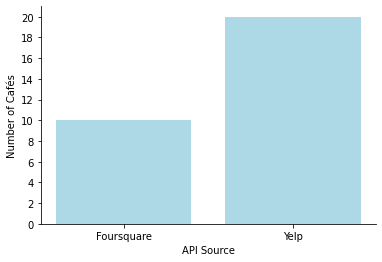

In [41]:
fig,ax=plt.subplots()
ax.bar(x_apisource, y_apisource, color='lightblue')
ax.set_xlabel('API Source')
ax.set_ylabel('Number of Cafés')
ax.set_yticks(range(0,22,2))
ax.set_xticklabels(['Foursquare','Yelp'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

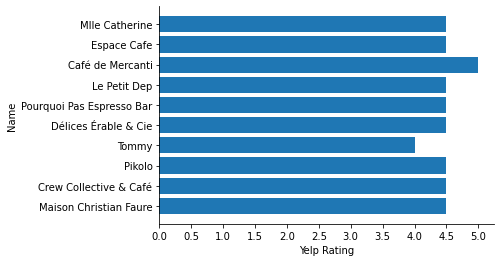

In [42]:
fig,ax2=plt.subplots()
ax2.barh(df_yelp_top10['name'],df_yelp_top10['rating'])
ax2.set_xlabel('Yelp Rating')
ax2.set_ylabel('Name')
ax2.set_xticks([0,0.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


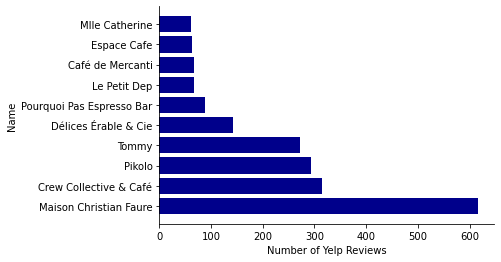

In [43]:
fig,ax3=plt.subplots()
ax3.barh(df_yelp_top10['name'],df_yelp_top10['review_count'], color='darkblue')
ax3.set_xlabel('Number of Yelp Reviews')
ax3.set_ylabel('Name')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

In [130]:
# df_yelpFsq_names_API=df_yelp_fsq_clean.groupby(['name'])['api_source'].count().reset_index(name='count')

#### Count each name spotted by one API but not the other
* was working but now not - May 14, 2022

In [288]:
df_api_count = df_yelp_fsq_clean.copy()

In [289]:
df_api_count.loc[df_api_count['api_source']=='yelp','yelp']=1
df_api_count.loc[df_api_count['api_source']=='foursquare', 'foursquare']=1
df_api_count['yelp'] = df_api_count['yelp'].fillna(0)
df_api_count['foursquare'] = df_api_count['foursquare'].fillna(0)

In [290]:
df_api_count.groupby('name').aggregate({''}).reset_index()

,name,foursquare
0,Aloha Espresso Bar,1
1,Café 1880,1
2,Café Luna d'Oro,1
3,Café Olimpico,2
4,Café SAT,1
5,Café Titanic,1
6,Café de Mercanti,1
7,Crew Collective & Café,2
8,Délices Érable & Cie,1
9,Espace Cafe,1


In [146]:
# df_api_count2 = df_api_count.groupby(['name'])['lat'].count().reset_index()

attempt 2

In [249]:
df_api_count2 = df_api_count.copy()

In [244]:
df_api_count2 = df_api_count.groupby('name').count()

In [245]:
df_api_count2.head()

,lat,lon,address,api_source,yelp,foursquare
name,,,,,,
Aloha Espresso Bar,1,1,1,1,1,1
Café 1880,1,1,1,1,1,1
Café Luna d'Oro,1,1,1,1,1,1
Café Olimpico,2,2,2,2,2,2
Café SAT,1,1,1,1,1,1


In [246]:
df_api_count2 = df_api_count2.drop(columns=['lat','lon','address','api_source'])

In [247]:
df_api_count2 = df_api_count2.sort_values(by=['foursquare','yelp'])

In [248]:
df_api_count2

,yelp,foursquare
name,,
Aloha Espresso Bar,1,1
Café 1880,1,1
Café Luna d'Oro,1,1
Café SAT,1,1
Café Titanic,1,1
Café de Mercanti,1,1
Délices Érable & Cie,1,1
Espace Cafe,1,1
La Finca,1,1


In [293]:
xlabel_api = list(df_api_count['name'])
print(xlabel_api)

['Aloha Espresso Bar', 'Café Différance', 'Café SAT', 'Café de Mercanti', 'Délices Érable & Cie', 'Espace Cafe', 'Le Petit Dep', 'Le Petit Dep - Saint-Sulpice', 'Les Moulins la Fayette', 'L’Amour du Pain', 'Maison Christian Faure', 'Mlle Catherine', 'Olive + Gourmando', 'Paquebot Vieux Mtl', 'Pikolo', 'Structure', "Café Luna d'Oro", 'Café Titanic', "Les Délices de l'Érable", 'Ming Tao Xuan', 'Paquebot', 'Tommy - Saint-Paul', 'Café Olimpico', 'Crew Collective & Café', 'La Finca', 'Tommy']


In [318]:
df_api_count

,name,yelp,foursquare
0,Aloha Espresso Bar,1,0
1,Café Différance,1,0
4,Café SAT,1,0
6,Café de Mercanti,1,0
8,Délices Érable & Cie,1,0
9,Espace Cafe,1,0
11,Le Petit Dep,1,0
12,Le Petit Dep - Saint-Sulpice,1,0
14,Les Moulins la Fayette,1,0
15,L’Amour du Pain,1,0


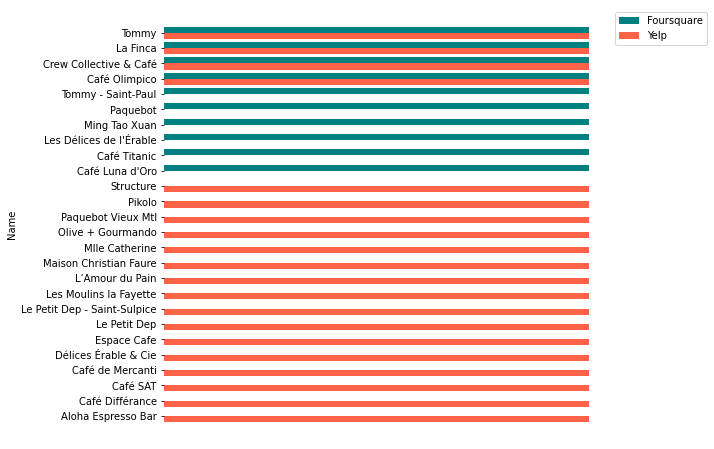

In [343]:
fig,ax4=plt.subplots(figsize=(8,8))
width=0.4
labels=['Foursquare','Yelp']
x_axis = np.arange(len(df_api_count['name']))
ax4.barh(x_axis+width/2,df_api_count['foursquare'],width,color='teal',label='Foursquare')
ax4.barh(x_axis-width/2,df_api_count['yelp'],width,color='tomato',label='Yelp')
ax4.set_yticks(x_axis)
ax4.set_yticklabels(xlabel_api, fontsize=10)
ax4.set_ylabel('Name')
ax4.tick_params(axis='x', bottom=False)
ax4.set_xticklabels([])
ax4.legend(labels, bbox_to_anchor=(1,1))
# ax3.set_xlabel('Number of Yelp Reviews')
# ax3.set_ylabel('Name')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)